In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# DATA CLEANING

In [2]:
df=pd.read_csv('Netflix TV Shows and Movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [3]:
df.drop(columns=['index','id','imdb_id'], inplace=True)
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [4]:
pd.set_option('display.max_colwidth',None)
uniqueitem=[]

for col in df.columns:
    uniqueitem.append([col, df[col].nunique(), df[col].unique(),df[col].dtype])

unique=pd.DataFrame(columns=['Column','Count of Unique Items','Unique Items', 'Datatype'], data=uniqueitem)
unique

Column  Count of Unique Items  \
0              title                   5237   
1               type                      2   
2        description                   5276   
3       release_year                     66   
4  age_certification                     11   
5            runtime                    197   
6         imdb_score                     81   
7         imdb_votes                   3831   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [5]:
#missing values
df.isna().sum()

title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [6]:
df['age_certification'].fillna('Unknown', inplace=True)
df.isna().sum()

title                 0
type                  0
description           5
release_year          0
age_certification     0
runtime               0
imdb_score            0
imdb_votes           16
dtype: int64

In [7]:
#Dealing with Imdb votes

df.dropna(subset=['imdb_votes'], inplace=True)
df.isna().sum()

title                0
type                 0
description          4
release_year         0
age_certification    0
runtime              0
imdb_score           0
imdb_votes           0
dtype: int64

In [ ]:
# EXPLORATORY DATA ANALYSIS

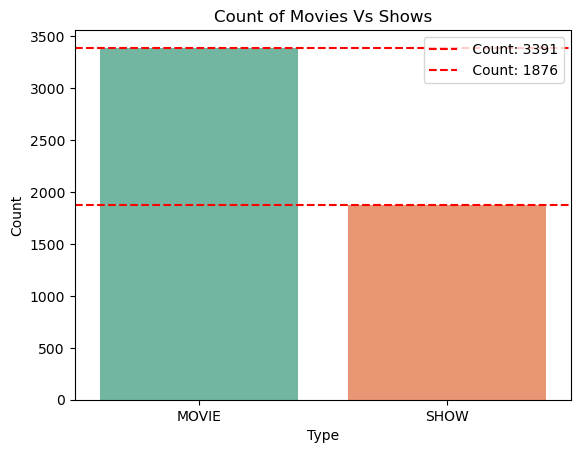

In [45]:
#COUNTPLOT

sns.countplot(data=df, x='type',hue='type', palette='Set2')

counts=df['type'].value_counts()
for i in counts:
    plt.axhline(y=i, color='red', linestyle='--',)
    
plt.legend([f' Count: {j}' for j in counts])

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Movies Vs Shows')
plt.show()

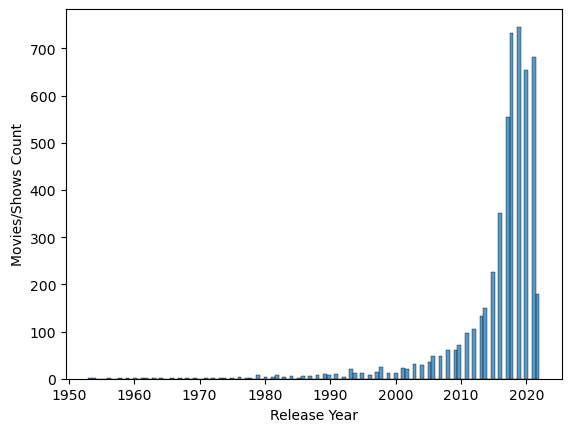

In [30]:
#TIME SERIES PLOT

sns.histplot(data=df, x='release_year')
plt.xlabel('Release Year')
plt.ylabel('Movies/Shows Count')
plt.show()

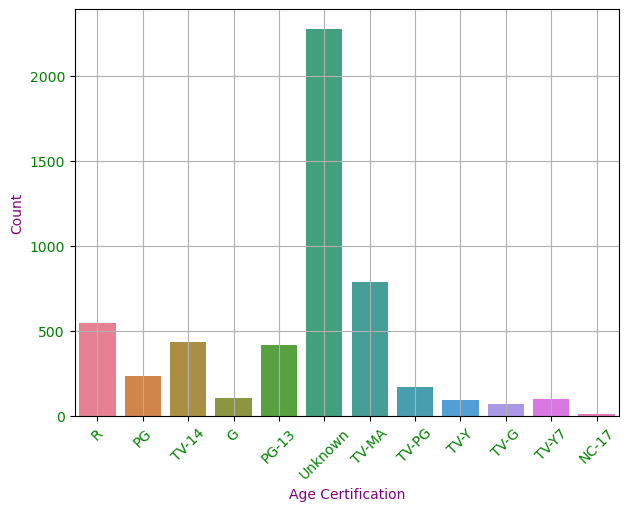

In [25]:
sns.countplot(data=df, x='age_certification', hue='age_certification')
plt.xlabel('Age Certification', color='purple')
plt.ylabel('Count', color='purple')
plt.tight_layout()
plt.xticks(rotation=45, color='green')
plt.yticks(color='green')
plt.grid()
plt.show()

In [36]:
rt=df.groupby('type')[['runtime']].sum().reset_index()
rt

,type,runtime
0,MOVIE,345242
1,SHOW,72475


In [63]:
max_movie=rt.loc[rt['type']=='MOVIE', 'runtime'].max()
max_show=rt.loc[rt['type']=='SHOW','runtime'].max()

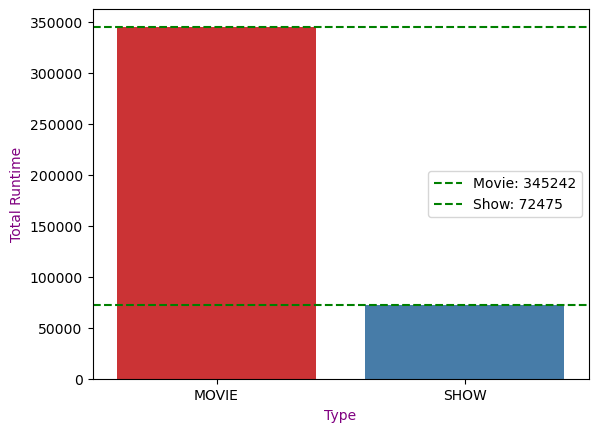

In [66]:
sns.barplot(data=rt, x='type', y='runtime',hue='type', palette='Set1')

plt.axhline(y=max_movie, color='green', linestyle='--', label=f'Movie: {max_movie}')
plt.axhline(y=max_show, color='green', linestyle='--', label=f'Show: {max_show}')
plt.xlabel('Type', color='purple')
plt.ylabel('Total Runtime',color='purple')
plt.legend()
plt.show()

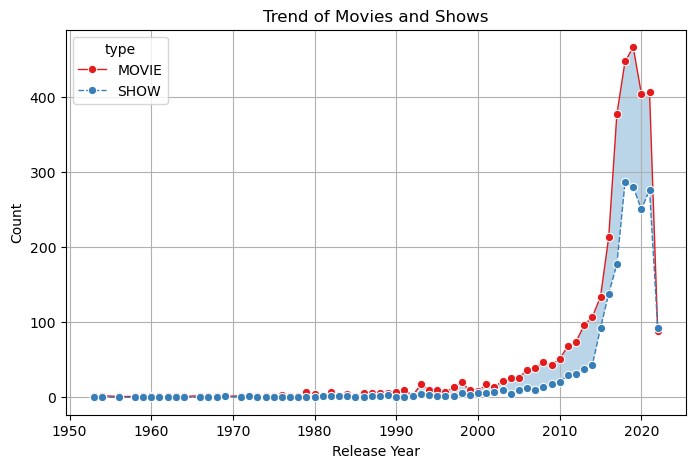

In [92]:
#LINE PLOT

ct=pd.crosstab(index=df['release_year'], columns=df['type'])
plt.figure(figsize=(8,5))
sns.lineplot(data=ct, palette='Set1', linewidth=1, marker='o')
plt.fill_between(ct.index, ct['MOVIE'], ct['SHOW'], alpha=0.3)
plt.grid()
plt.title('Trend of Movies and Shows')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

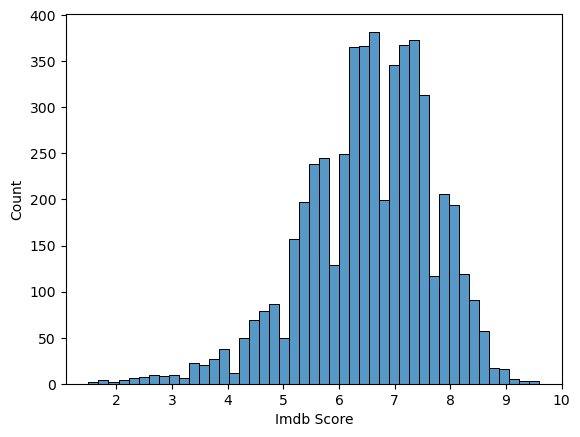

In [98]:
# IMDB SCORE COUNTS

sns.histplot(data=df, x='imdb_score')
plt.xlabel('Imdb Score')
plt.show()

In [99]:
df['imdb_score'].mean()

6.533263717486235

In [103]:
df['imdb_score'].mode()[0]

6.6

In [ ]:
# CORRELATION ANALYSIS

In [109]:
score_vote= df.groupby('imdb_score')['imdb_votes'].count().reset_index()
score_vote.head()

,imdb_score,imdb_votes
0,1.5,1
1,1.6,1
2,1.7,3
3,1.8,1
4,1.9,1


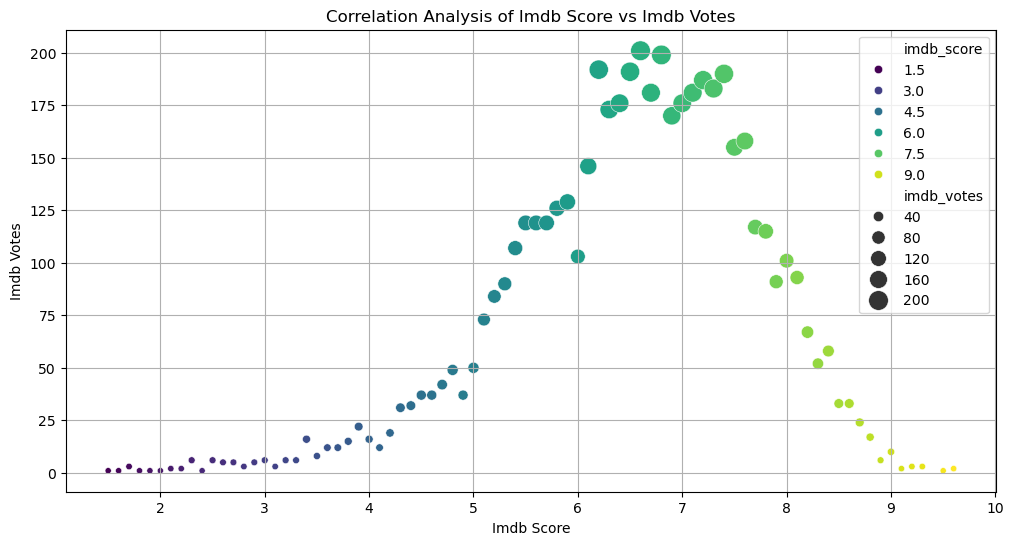

In [123]:
#SCATTERPLOT

plt.figure(figsize=(12,6))
sns.scatterplot(data=score_vote, x='imdb_score', y='imdb_votes', hue='imdb_score', palette='viridis',size='imdb_votes', sizes=(20,200))
plt.xlabel('Imdb Score')
plt.ylabel('Imdb Votes')
plt.title('Correlation Analysis of Imdb Score vs Imdb Votes')
plt.grid()
plt.show()

<Axes: >

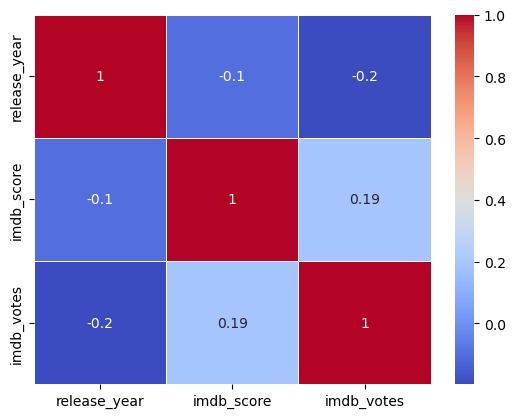

In [143]:
# HEATMAP

heatmap_data=df[['release_year', 'imdb_score', 'imdb_votes']].corr()
sns.heatmap(data=heatmap_data, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)

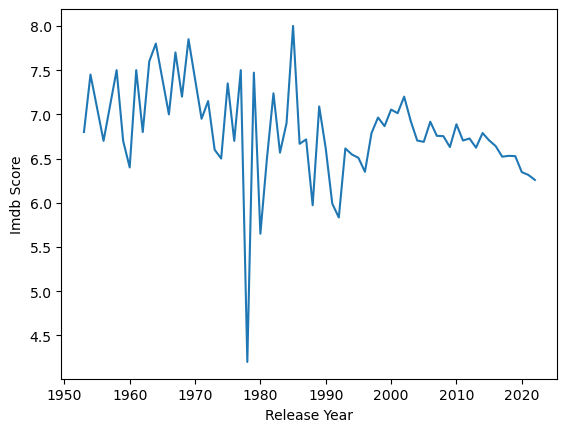

In [147]:
sns.lineplot(data=df, x='release_year', y='imdb_score',errorbar=None)
plt.xlabel('Release Year')
plt.ylabel('Imdb Score')
plt.show()

Text(0, 0.5, 'Imdb Votes')

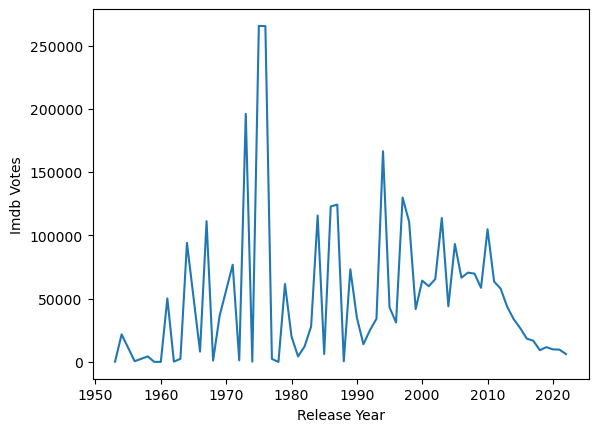

In [149]:
sns.lineplot(data=df, x='release_year', y='imdb_votes', errorbar=None)
plt.xlabel('Release Year')
plt.ylabel('Imdb Votes')